# Simulating a match
This can be done many differet ways from statistical models informed based on the team/player performance or simple models which focus on specific attributes or are random simulators.  

---
To get started, a simple model will be leveraged to simulate a football match. One in which goals occur completely at random during the match.

In [1]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import time
import pylab as plt

### Setting parameters for the simplified model
Set up the basic scoring rates for football and other contoling aspects of a game. 

In [2]:
# Length of match
match_minutes = 90
# Average goals per match
goals_per_match = 2.79
# Probability of a goal per minute
prob_per_minute = np.array(goals_per_match/match_minutes)
print(f'The probability of a goal per minute is {prob_per_minute:.5f}\n' )

The probability of a goal per minute is 0.03100



### Simulating a single game
To simulate a single game, Goals go in with the same probability every minute. Run the simulation below 10 times. How many times were there 3 goals in a match?

In [3]:
def sim_match(match_minutes:int=90, show:bool=False, ):
    '''Simulate a soccer match without stipulating team details'''
    
    #Count of the number of goals
    goals=0

    for minute in range(match_minutes):
        r=rnd.rand(1,1) # Generate a random number between 0 and 1.
        
        # Prints an X when there is a goal and a zero otherwise.
        if (r < prob_per_minute): 
            if show:
                print('X', end = ' ') #Goal - if the random number is less than the goal probability.
                time.sleep(0.3)  #Longer pause
            goals+=1
            
        else:
            if show:
                print('o', end = ' ')
                time.sleep(0.1)  #Short pause

    if show:
        print('Final whistle. \n \nThere were ' + str(goals) + ' goals.')
    return goals

In [4]:
sim_match(show=True)

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o Final whistle. 
 
There were 1 goals.


1

           Goals
count  10.000000
mean    2.400000
std     1.429841
min     1.000000
25%     2.000000
50%     2.000000
75%     2.750000
max     6.000000


Text(0.5, 1.0, 'Goals per match simulated')

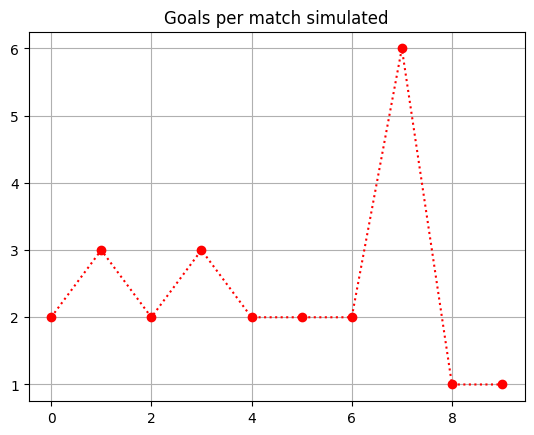

In [31]:
G=pd.DataFrame([sim_match() for i in range(10)], columns=['Goals'])

print(G.describe())
fig, ax = plt.subplots()
G.Goals.plot(style='r:o', ax=ax)
ax.grid(True)
ax.set_title('Goals per match simulated')

### Simulating goals over a season
Now there is a need to shift to an entire season. This requires 380 games to be played accounting for the Fall and Spring of a professional campaign.  To accomplish this the code for the single match is extended and modified to simulate the games and store the results in an array.

1. Define new simulateMatch function 
2. Loop over 380 matches
3. Store the number of goals for each match in an array 
4. Create a histogram of the number of goals

In [32]:
def simulateMatch(n:int=90, p:float=0.03100):
    '''
    Simulate a football match
    
    n - number of time units
    p - probability per time unit of a goal
    display_match == True then display simulation output for match.

    Return array with Count of the number of goals per match across the season'''
    
    goals = 0
    for minute in range(n): 
        r = rnd.rand(1, 1) # Generate a random number between 0 and 1.
        if (r < p):
            goals += 1 # Incrament Goal - if the random number is less than the goal probability.
            
    return goals

In [33]:
# Choose a Number of matches
num_matches = 380

# Loop over all the matches return goals storing the value in initialized numpy array.
goals = np.zeros(num_matches)
for i in range(num_matches):
    goals[i] = simulateMatch(match_minutes, prob_per_minute) # stores value at match index for range

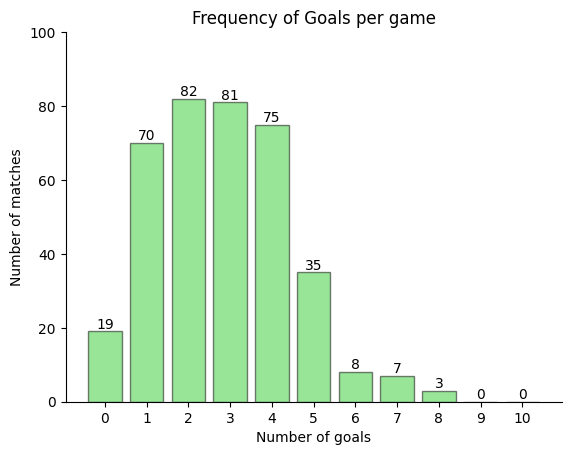

In [36]:
# Create a histogram

fig, ax = plt.subplots(num=1)

histogram_range = np.arange(-0.5, 10.51, 1)
histogram_goals = np.histogram(goals, histogram_range)

p = ax.bar(histogram_goals[1][:-1] + 0.5, histogram_goals[0], color='limegreen', edgecolor='black', linestyle='-', alpha=0.5)
ax.set_ylim(0, 100)
ax.bar_label(p)
ax.spines[['top','right']].set_visible(False)
ax.set_xticks(np.arange(0, 11, step=1))
ax.set_yticks(np.arange(0, 101, step=20))
ax.set_xlabel('Number of goals')
ax.set_ylabel('Number of matches')
ax.set_title('Frequency of Goals per game')
plt.show()